# **ESTADÍSTICAS SALUD GLOBAL**

Este conjunto de datos ofrece estadísticas sobre la salud global, con un enfoque en diversas enfermedades, tratamientos y resultados. Los datos abarcan múltiples países y años. Me gustaría hacer un análisis de estos datos para ver tipos de enfermedades por país y región del mundo y por sexo, teniendo también en cuenta el acceso a la Sanidad en cada uno de los países, dónde viven, y también hacer una comparativa por continentes.

**Country**: Nombre del país donde se registraron los datos de salud.

**Year**: Año en que se recopilaron los datos.

**Disease Name**: Nombre de la enfermedad o condición de salud analizada.

**Prevalence Rate (%)**: Porcentaje de la población afectada por la enfermedad.

**Incidence Rate (%)**: Porcentaje de casos nuevos o recién diagnosticados.

**Mortality Rate (%)**: Porcentaje de la población afectada que fallece a causa de la enfermedad.

**Age Group**: Rango de edad más afectado por la enfermedad.

**Gender:** Género(s) afectados por la enfermedad (Masculino, Femenino, Ambos).

**Population Affected**: Número total de personas afectadas por la enfermedad.

**Healthcare Access (%)**: Porcentaje de la población con acceso a servicios de salud.

**Doctors per 1000**: Número de médicos por cada 1000 habitantes.

**Average Treatment Cost (USD)**:Costo promedio del tratamiento en dólares estadounidenses.

**Availability of Vaccines/Treatment**: Disponibilidad de vacunas o tratamientos.

**Recovery Rate (%)**: Porcentaje de personas que se recuperan de la enfermedad.

**Per Capita Income (USD)**: Ingreso promedio por persona en el país.

**Education Index:** Nivel educativo promedio en el país.

**Urbanization Rate (%):** Porcentaje de la población que vive en zonas urbanas.

In [95]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
os.chdir(r"/content/sample_data/")
df = pd.read_csv("Global_Health_Statistics.csv")

In [97]:
df.head()

,Country,Year,Disease Name,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,0.95,1.55,8.42,0-18,Male,471007,57.74,3.34,7.58,Medication,21064,No,91.82,2.16,16886,0.79,86.02
1,France,2002,Ebola,12.46,8.63,8.75,61+,Male,634318,89.21,1.33,5.11,Surgery,47851,Yes,76.65,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,0.91,2.35,6.22,36-60,Male,154878,56.41,4.07,3.49,Vaccination,27834,Yes,98.55,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,4.68,6.29,3.99,0-18,Other,446224,85.20,3.18,8.44,Surgery,144,Yes,67.35,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,0.83,13.59,7.01,61+,Male,472908,67.00,4.61,5.90,Medication,8908,Yes,50.06,6.93,47701,0.50,48.14


Se revisa el tipo de datos del DF y si hay valores faltantes.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Prevalence Rate (%)                 1000000 non-null  float64
 4   Incidence Rate (%)                  1000000 non-null  float64
 5   Mortality Rate (%)                  1000000 non-null  float64
 6   Age Group                           1000000 non-null  object 
 7   Gender                              1000000 non-null  object 
 8   Population Affected                 1000000 non-null  int64  
 9   Healthcare Access (%)               1000000 non-null  float64
 10  Doctors per 1000                    1000000 non-null  float64
 11  Hospital Bed

No hay valores faltantes


Quito algunas columnas que no me sirven para mi análisis y así se trabaja con menos datos

In [77]:
df=df.drop("Availability of Vaccines/Treatment",axis=1)
df=df.drop("Improvement in 5 Years (%)",axis=1)
df=df.drop("Average Treatment Cost (USD)",axis=1)
df=df.drop("Hospital Beds per 1000", axis=1)
df=df.drop("Doctors per 1000", axis=1)



Reviso si los tipos de cada una de las variables son correctos, para corregirlo en caso de que no lo sean.


Primero quiero ver el tipo de enfermedades que se están analizando y dentro de la categoría de enfermedad qué enfermedades se contemplan.

In [78]:
df["Disease Name"].unique()

array(['Malaria', 'Ebola', 'COVID-19', "Parkinson's Disease",
       'Tuberculosis', 'Dengue', 'Rabies', 'Cholera', 'Leprosy', 'Cancer',
       'Diabetes', 'Measles', 'Zika', "Alzheimer's Disease", 'Polio',
       'Hypertension', 'Asthma', 'HIV/AIDS', 'Influenza', 'Hepatitis'],
      dtype=object)

Obtengo la cantidad de países reflejados en este estudio y cuáles son:

In [79]:
df["Country"].unique()

array(['Italy', 'France', 'Turkey', 'Indonesia', 'Saudi Arabia', 'USA',
       'Nigeria', 'Australia', 'Canada', 'Mexico', 'China',
       'South Africa', 'Japan', 'UK', 'Russia', 'Brazil', 'Germany',
       'India', 'Argentina', 'South Korea'], dtype=object)

In [80]:
df["Country"].nunique()

20

Son **20** países, 5 en Europa, 7 en Asia, 5 en América , 2 en África y 1 en Oceanía. Voy a hacer 5 listas agrupando los países por continente pero no sé si puedo sacar buenas conclusiones, ya que el continente africano no queda bien reflejado al no incluir a Egipto, que tiene una gran población y relevancia dentro del mismo.

Creo un diccionario con estos nuevos datos que quiero añadir:

In [99]:
continentes = {
    "USA": "América",
    "Canada": "América",
    "Mexico": "América",
    "Brazil": "América",
    "Argentina": "América",

    "Turkey": "Asia",
    "Indonesia": "Asia",
    "Saudi Arabia": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "India": "Asia",
    "South Korea": "Asia",
    "Russia": "Asia",


    "Germany": "Europa",
    "France": "Europa",
    "UK": "Europa",
    "Italy": "Europa",

    "South Africa": "África",
    "Nigeria": "África",

    "Australia": "Oceanía"
}
continentes

{'USA': 'América',
 'Canada': 'América',
 'Mexico': 'América',
 'Brazil': 'América',
 'Argentina': 'América',
 'Turkey': 'Asia',
 'Indonesia': 'Asia',
 'Saudi Arabia': 'Asia',
 'China': 'Asia',
 'Japan': 'Asia',
 'India': 'Asia',
 'South Korea': 'Asia',
 'Russia': 'Asia',
 'Germany': 'Europa',
 'France': 'Europa',
 'UK': 'Europa',
 'Italy': 'Europa',
 'South Africa': 'África',
 'Nigeria': 'África',
 'Australia': 'Oceanía'}

Creo un dataframe incluyendo los continentes con sus países correspondientes

In [100]:
df["Continente"] = df["Country"].map(continentes)

Obtengo los años en los que se realizó el estudio

In [83]:
df["Year"].unique()

array([2013, 2002, 2015, 2011, 2007, 2000, 2006, 2009, 2004, 2020, 2024,
       2001, 2019, 2014, 2021, 2010, 2003, 2022, 2005, 2008, 2017, 2023,
       2012, 2016, 2018])

In [84]:
anios_ordenados = sorted(df["Year"].unique())
anios_ordenados

[np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024)]

El estudio se ha realizado entre los años **2000 y 2024**

#**Enfermedades más comunes por población afectada**

In [134]:
enfermedades_mas_comunes = df.groupby("Disease Name")["Population Affected"].sum().sort_values(ascending=False)

print("Ranking de Enfermedades Más Comunes (por población afectada):\n")
for i, (disease, population) in enumerate(enfermedades_mas_comunes.items(), 1):
    print(f"{i}. {disease}: {population:,} personas")

Ranking de Enfermedades Más Comunes (por población afectada):

1. Zika: 25,307,554,082 personas
2. Cancer: 25,235,121,430 personas
3. Leprosy: 25,177,373,936 personas
4. Asthma: 25,146,142,810 personas
5. Dengue: 25,133,166,300 personas
6. COVID-19: 25,118,520,752 personas
7. HIV/AIDS: 25,101,603,480 personas
8. Influenza: 25,095,996,008 personas
9. Cholera: 25,086,966,699 personas
10. Diabetes: 25,069,386,449 personas
11. Alzheimer's Disease: 25,042,569,375 personas
12. Rabies: 25,034,142,572 personas
13. Malaria: 25,015,737,911 personas
14. Measles: 24,982,256,802 personas
15. Polio: 24,974,691,110 personas
16. Ebola: 24,905,002,514 personas
17. Hepatitis: 24,904,267,850 personas
18. Tuberculosis: 24,895,979,586 personas
19. Parkinson's Disease: 24,801,241,635 personas
20. Hypertension: 24,707,706,062 personas


La enfermedad con más población afectada a nivel mundial en este estudio es **ZIKA** con **25,307,554,082 personas**

#**Enfermedades por país con más número de población afectada**

In [137]:
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    top_disease = subset.loc[subset["Population Affected"].idxmax()]

    print(f"{country}: {top_disease['Disease Name']} ({top_disease['Population Affected']:,} personas)")

Italy: Ebola (999,993 personas)
France: Alzheimer's Disease (999,995 personas)
Turkey: Ebola (999,998 personas)
Indonesia: Parkinson's Disease (999,990 personas)
Saudi Arabia: Diabetes (999,963 personas)
USA: Hypertension (999,961 personas)
Nigeria: Cancer (999,994 personas)
Australia: Alzheimer's Disease (999,998 personas)
Canada: Ebola (999,970 personas)
Mexico: Rabies (999,993 personas)
China: Cancer (999,989 personas)
South Africa: Parkinson's Disease (999,991 personas)
Japan: Rabies (999,999 personas)
UK: Zika (999,999 personas)
Russia: HIV/AIDS (999,979 personas)
Brazil: Influenza (999,998 personas)
Germany: Cancer (999,967 personas)
India: Diabetes (999,945 personas)
Argentina: Asthma (1,000,000 personas)
South Korea: Asthma (999,978 personas)


Me llaman la atención varios datos:

*   Que en Italia , Turquía y Canadá la enfermedad con más casos sea Ébola.
*   Que en UK la enfermedad con más casos sea Zika.



#**Enfermedad más común por porcentaje de Prevalencia**

In [127]:
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    max_row = subset.loc[subset["Prevalence Rate (%)"].idxmax()]
    min_row = subset.loc[subset["Prevalence Rate (%)"].idxmin()]

    print(f"\n {country}")
    print(f"  Enfermedad más común: {max_row['Disease Name']} ({max_row['Prevalence Rate (%)']}%)")
    print(f"  Enfermedad menos común: {min_row['Disease Name']} ({min_row['Prevalence Rate (%)']}%)")


 Italy
  Enfermedad más común: Influenza (20.0%)
  Enfermedad menos común: Hypertension (0.1%)

 France
  Enfermedad más común: Dengue (20.0%)
  Enfermedad menos común: Cancer (0.1%)

 Turkey
  Enfermedad más común: Cholera (20.0%)
  Enfermedad menos común: COVID-19 (0.1%)

 Indonesia
  Enfermedad más común: Diabetes (20.0%)
  Enfermedad menos común: HIV/AIDS (0.1%)

 Saudi Arabia
  Enfermedad más común: Parkinson's Disease (20.0%)
  Enfermedad menos común: Hypertension (0.1%)

 USA
  Enfermedad más común: COVID-19 (20.0%)
  Enfermedad menos común: Dengue (0.1%)

 Nigeria
  Enfermedad más común: COVID-19 (20.0%)
  Enfermedad menos común: Leprosy (0.1%)

 Australia
  Enfermedad más común: Malaria (20.0%)
  Enfermedad menos común: Dengue (0.1%)

 Canada
  Enfermedad más común: Leprosy (20.0%)
  Enfermedad menos común: Tuberculosis (0.1%)

 Mexico
  Enfermedad más común: Diabetes (20.0%)
  Enfermedad menos común: Diabetes (0.1%)

 China
  Enfermedad más común: Influenza (20.0%)
  Enferme

#**Enfermedad más común por cantidad de Población Afectada**

In [130]:
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    max_row = subset.loc[subset["Population Affected"].idxmax()]
    min_row = subset.loc[subset["Population Affected"].idxmin()]

    print(f"\n {country}")
    print(f"  Más personas afectadas: {max_row['Disease Name']} ({max_row['Population Affected']:,} personas)")
    print(f"  Menos personas afectadas: {min_row['Disease Name']} ({min_row['Population Affected']:,} personas)")


 Italy
  Más personas afectadas: Ebola (999,993 personas)
  Menos personas afectadas: Leprosy (1,035 personas)

 France
  Más personas afectadas: Alzheimer's Disease (999,995 personas)
  Menos personas afectadas: Tuberculosis (1,014 personas)

 Turkey
  Más personas afectadas: Ebola (999,998 personas)
  Menos personas afectadas: Alzheimer's Disease (1,011 personas)

 Indonesia
  Más personas afectadas: Parkinson's Disease (999,990 personas)
  Menos personas afectadas: Ebola (1,003 personas)

 Saudi Arabia
  Más personas afectadas: Diabetes (999,963 personas)
  Menos personas afectadas: Cholera (1,008 personas)

 USA
  Más personas afectadas: Hypertension (999,961 personas)
  Menos personas afectadas: Cancer (1,000 personas)

 Nigeria
  Más personas afectadas: Cancer (999,994 personas)
  Menos personas afectadas: Measles (1,001 personas)

 Australia
  Más personas afectadas: Alzheimer's Disease (999,998 personas)
  Menos personas afectadas: Cancer (1,010 personas)

 Canada
  Más person

#**Población afectada por país , enfermedad y año**

In [140]:
enfermos_anio_pais_enfermedad = df.groupby(["Country", "Year", "Disease Name"])["Population Affected"].sum().reset_index()

print("Población afectada por país, año y enfermedad:\n")
print(enfermos_anio_pais_enfermedad)

Población afectada por país, año y enfermedad:

        Country  Year         Disease Name  Population Affected
0     Argentina  2000  Alzheimer's Disease             47370554
1     Argentina  2000               Asthma             47704791
2     Argentina  2000             COVID-19             49908299
3     Argentina  2000               Cancer             51015173
4     Argentina  2000              Cholera             47933525
...         ...   ...                  ...                  ...
9995        USA  2024  Parkinson's Disease             42966521
9996        USA  2024                Polio             46725978
9997        USA  2024               Rabies             56838441
9998        USA  2024         Tuberculosis             46766367
9999        USA  2024                 Zika             51144636

[10000 rows x 4 columns]


In [153]:
print("Enfermedad más común por año y país:\n")
grouped = df.groupby(["Country", "Year"])

for (country, year), group in grouped:
    top = group.loc[group["Population Affected"].idxmax()]
    print(f"{country} - {year}: {top['Disease Name']} ({top['Population Affected']:,} personas)")

Enfermedad más común por año y país:

Argentina - 2000: Alzheimer's Disease (999,739 personas)
Argentina - 2001: Tuberculosis (998,766 personas)
Argentina - 2002: Hypertension (999,733 personas)
Argentina - 2003: Tuberculosis (999,607 personas)
Argentina - 2004: Cholera (999,995 personas)
Argentina - 2005: Cholera (999,487 personas)
Argentina - 2006: HIV/AIDS (999,559 personas)
Argentina - 2007: COVID-19 (999,810 personas)
Argentina - 2008: Asthma (1,000,000 personas)
Argentina - 2009: Dengue (999,381 personas)
Argentina - 2010: Polio (999,330 personas)
Argentina - 2011: Diabetes (999,981 personas)
Argentina - 2012: Leprosy (999,896 personas)
Argentina - 2013: Parkinson's Disease (998,544 personas)
Argentina - 2014: Dengue (999,984 personas)
Argentina - 2015: Polio (999,930 personas)
Argentina - 2016: Asthma (999,767 personas)
Argentina - 2017: Cholera (999,600 personas)
Argentina - 2018: Parkinson's Disease (998,419 personas)
Argentina - 2019: Cancer (998,896 personas)
Argentina - 202

#**Enfermedades más comunes por género** :
Voy a analizar qué **enfermedades** afectan más a **mujeres** y cuáles a **hombres** y a una tercera categoría llamada **other** ,teniendo en cuenta estos datos.

In [142]:
enfermedad_sexo_poblacion = df.groupby(["Gender", "Disease Name"])["Population Affected"].sum().reset_index()

print("Enfermedades más comunes por género:\n")
for gender in enfermedad_sexo_poblacion["Gender"].unique():
    subset = enfermedad_sexo_poblacion[enfermedad_sexo_poblacion["Gender"] == gender]
    top = subset.loc[subset["Population Affected"].idxmax()]
    print(f"{gender}: {top['Disease Name']} ({top['Population Affected']:,} personas)")

Enfermedades más comunes por género:

Female: Zika (8,448,262,662 personas)
Male: Leprosy (8,532,327,840 personas)
Other: HIV/AIDS (8,444,815,364 personas)


Zika es la enfermedad más común en mujeres, Lepra en hombres y HIV en categoría other. Me sorprende un poco que la lepra sea la enfermedad más común en hombres así que voy a analizar más la incidencia de esta enfermedad y dónde es más habitual.

#**Incidencia de la Lepra en el mundo teniendo en cuenta el porcentaje de Urbanización y el índice de Educación**

In [145]:
df_lepra = df[df["Disease Name"] == "Leprosy"]

df_sorted = df_lepra.sort_values(by="Prevalence Rate (%)", ascending=False)

#top_countries = df_sorted[["Country", "Prevalence Rate (%)", "Urbanization Rate (%)"]]
top_countries = df_sorted[["Country", "Prevalence Rate (%)", "Urbanization Rate (%)", "Education Index"]]

print(top_countries.head(10).to_string(index=False))



    Country  Prevalence Rate (%)  Urbanization Rate (%)  Education Index
    Nigeria                20.00                  23.25             0.80
     Mexico                20.00                  24.54             0.82
      Italy                20.00                  81.42             0.88
     Russia                20.00                  24.85             0.82
      India                20.00                  85.93             0.86
         UK                20.00                  38.65             0.85
South Korea                20.00                  41.08             0.62
     Brazil                20.00                  85.95             0.52
     Canada                20.00                  80.67             0.60
     Russia                19.99                  58.19             0.73


De los países donde la prevalencia es más alta, veo que están Italia y UK que no me cuadra en absoluto.

Sigo analizando los datos aunque no sean reales y por tanto las conclusiones obtenidas buenas.

#**Enfermedades con mayor tasa de mortalidad por país y grupo de edad**

In [148]:
print("Enfermedades con mayor tasa de mortalidad por país y grupo de edad:\n")
for country in df["Country"].unique():
    country_data = df[df["Country"] == country]

    # Para cada grupo de edad dentro del país
    for age_group in country_data["Age Group"].unique():
        subset = country_data[country_data["Age Group"] == age_group]
        if not subset.empty:
            top = subset.loc[subset["Mortality Rate (%)"].idxmax()]
            print(f"{country} | Edad: {age_group} → {top['Disease Name']} ({top['Mortality Rate (%)']}%)")

Enfermedades con mayor tasa de mortalidad por país y grupo de edad:

Italy | Edad: 0-18 → Cancer (10.0%)
Italy | Edad: 61+ → Measles (10.0%)
Italy | Edad: 19-35 → Leprosy (10.0%)
Italy | Edad: 36-60 → Rabies (10.0%)
France | Edad: 61+ → Leprosy (10.0%)
France | Edad: 19-35 → Hepatitis (10.0%)
France | Edad: 0-18 → Hepatitis (10.0%)
France | Edad: 36-60 → Leprosy (10.0%)
Turkey | Edad: 36-60 → Alzheimer's Disease (10.0%)
Turkey | Edad: 19-35 → Ebola (10.0%)
Turkey | Edad: 0-18 → Diabetes (10.0%)
Turkey | Edad: 61+ → Hepatitis (10.0%)
Indonesia | Edad: 0-18 → Asthma (10.0%)
Indonesia | Edad: 36-60 → Asthma (10.0%)
Indonesia | Edad: 19-35 → Rabies (10.0%)
Indonesia | Edad: 61+ → Polio (10.0%)
Saudi Arabia | Edad: 61+ → Cancer (10.0%)
Saudi Arabia | Edad: 0-18 → Cancer (10.0%)
Saudi Arabia | Edad: 36-60 → Cholera (10.0%)
Saudi Arabia | Edad: 19-35 → Polio (10.0%)
USA | Edad: 61+ → Tuberculosis (10.0%)
USA | Edad: 36-60 → Tuberculosis (10.0%)
USA | Edad: 0-18 → Hypertension (10.0%)
USA | Ed

Saco las enfermedades más comunes por país por rango de edad. Para ello, habría que ir eligiendo el país:

In [154]:
pais = "Argentina"
df_pais = df[df["Country"] == pais]

print(f"Enfermedad más común por rango de edad en {pais}:\n")
for age_group in df_pais["Age Group"].unique():
    subset = df_pais[df_pais["Age Group"] == age_group]
    top = subset.loc[subset["Population Affected"].idxmax()]
    print(f"Edad {age_group}: {top['Disease Name']} ({top['Population Affected']:,} personas)")

Enfermedad más común por rango de edad en Argentina:

Edad 61+: Measles (999,962 personas)
Edad 0-18: Asthma (1,000,000 personas)
Edad 19-35: Cholera (999,995 personas)
Edad 36-60: Diabetes (999,775 personas)


#**Enfermedades con mayor tasa de mortalidad por país y enfermedad**

In [147]:
enfermedad_tasamortalidad_pais = df.groupby(["Country", "Disease Name"])["Mortality Rate (%)"].mean().reset_index()
sorted_group = enfermedad_tasamortalidad_pais.sort_values(by=["Country", "Mortality Rate (%)"], ascending=[True, False])
print("Enfermedades con mayor tasa de mortalidad por país:\n")
for country in sorted_group["Country"].unique():
    subset = sorted_group[sorted_group["Country"] == country]
    top = subset.iloc[0]  # enfermedad con mayor mortalidad en ese país
    print(f"{country}: {top['Disease Name']} ({top['Mortality Rate (%)']}%)")

Enfermedades con mayor tasa de mortalidad por país:

Argentina: Diabetes (5.127741670094611%)
Australia: HIV/AIDS (5.138639618138425%)
Brazil: COVID-19 (5.179767061708214%)
Canada: Rabies (5.151473895582329%)
China: Asthma (5.184743019020639%)
France: Parkinson's Disease (5.1708602150537635%)
Germany: Asthma (5.188142119888845%)
India: Leprosy (5.2024929859719435%)
Indonesia: Parkinson's Disease (5.152597077244258%)
Italy: Alzheimer's Disease (5.204165998396151%)
Japan: Hepatitis (5.155308896210873%)
Mexico: Tuberculosis (5.166148538961039%)
Nigeria: COVID-19 (5.220434439178515%)
Russia: Cancer (5.163564705882353%)
Saudi Arabia: Asthma (5.141629802095459%)
South Africa: Zika (5.097000400480576%)
South Korea: Parkinson's Disease (5.164582329317269%)
Turkey: Zika (5.157434959349594%)
UK: Measles (5.190866471326915%)
USA: Rabies (5.126278225806452%)


#**Recuperación Promedio**

In [112]:
recuperacion_promedio = df.groupby("Country")["Recovery Rate (%)"].mean()
print(recuperacion_promedio)

Country
Argentina       74.529121
Australia       74.492637
Brazil          74.400868
Canada          74.512061
China           74.533069
France          74.460776
Germany         74.550599
India           74.461938
Indonesia       74.604501
Italy           74.565339
Japan           74.416866
Mexico          74.509848
Nigeria         74.457166
Russia          74.491571
Saudi Arabia    74.604349
South Africa    74.461773
South Korea     74.455838
Turkey          74.457858
UK              74.465987
USA             74.506540
Name: Recovery Rate (%), dtype: float64


#**Enfermedad más y menos mortal por país**

In [123]:
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    max_row = subset.loc[subset["Mortality Rate (%)"].idxmax()]
    min_row = subset.loc[subset["Mortality Rate (%)"].idxmin()]

    print(f"\n {country}")
    print(f"  Más mortal: {max_row['Disease Name']} ({max_row['Mortality Rate (%)']}%)")
    print(f"  Menos mortal: {min_row['Disease Name']} ({min_row['Mortality Rate (%)']}%)")


 Italy
  Más mortal: Cancer (10.0%)
  Menos mortal: Parkinson's Disease (0.1%)

 France
  Más mortal: Leprosy (10.0%)
  Menos mortal: Cholera (0.1%)

 Turkey
  Más mortal: Ebola (10.0%)
  Menos mortal: Tuberculosis (0.1%)

 Indonesia
  Más mortal: Asthma (10.0%)
  Menos mortal: Influenza (0.1%)

 Saudi Arabia
  Más mortal: Cancer (10.0%)
  Menos mortal: Asthma (0.1%)

 USA
  Más mortal: Zika (10.0%)
  Menos mortal: HIV/AIDS (0.1%)

 Nigeria
  Más mortal: Leprosy (10.0%)
  Menos mortal: Influenza (0.1%)

 Australia
  Más mortal: Hypertension (10.0%)
  Menos mortal: Hepatitis (0.1%)

 Canada
  Más mortal: HIV/AIDS (10.0%)
  Menos mortal: COVID-19 (0.1%)

 Mexico
  Más mortal: Cancer (10.0%)
  Menos mortal: Alzheimer's Disease (0.1%)

 China
  Más mortal: COVID-19 (10.0%)
  Menos mortal: Asthma (0.1%)

 South Africa
  Más mortal: Dengue (10.0%)
  Menos mortal: Polio (0.1%)

 Japan
  Más mortal: Malaria (10.0%)
  Menos mortal: Malaria (0.1%)

 UK
  Más mortal: Ebola (10.0%)
  Menos mortal

#**Enfermedad más común por continente**

In [152]:
enfermedad_continente = df.groupby(["Continente", "Disease Name"])["Population Affected"].sum().reset_index()

print("Enfermedad más común por continente:\n")
for continent in enfermedad_continente["Continente"].unique():
    subset = enfermedad_continente[enfermedad_continente["Continente"] == continent]
    top = subset.loc[subset["Population Affected"].idxmax()]
    print(f"{continent}: {top['Disease Name']} ({top['Population Affected']:,} personas)")

Enfermedad más común por continente:

América: Zika (6,361,801,871 personas)
Asia: HIV/AIDS (10,144,780,099 personas)
Europa: Rabies (5,135,310,720 personas)
Oceanía: Hepatitis (1,293,990,565 personas)
África: Polio (2,575,989,103 personas)


##**OBJETIVO Y CONCLUSIONES - BREVE RESUMEN PARA PRESENTACIÓN**

Este conjunto de datos ofrece estadísticas completas sobre la salud global, con un enfoque en diversas enfermedades, tratamientos y resultados. Los datos abarcan múltiples países (20) y desde el año 2000 al 2024. Me gustaría hacer un análisis de estos datos para ver tipos de enfermedades por país y región del mundo y por sexo, teniendo también en cuenta el acceso a la Sanidad en cada uno de los países, dónde viven, y también hacer una comparativa por continentes.

Este dataset me ha desconcertado en varias ocasiones arrojando resultados que no me parecen correctos, he revisado el origen de los datos y aunque teóricamente se han basado en estadísticas de  prevalencias de enfermedades en el mundo, algunos de los datos son sintéticos, por lo que es normal que los resultados sean un poco extraños en ocasiones, incluso imposibles.

Tras los análisis realizados se ha llegado a las siguientes conclusiones:

*   **Enfermedad con más población afectada** en estos 24 años de estudio es el **ZIKA 25,307,554,082 personas**
*   **Enfermedad con más casos por país**, aquí me ha llamado la atención que en **Italia , Turquía y Canadá la enfermedad con más casos sea Ébola y que en UK la enfermedad con más casos sea Zika**
*   **Enfermedad más común por cantidad de Población Afectada** me llama la atención que en USA en los años 2021 y 2024 la enfermedad con más enfermos fue la **lepra**, que es imposible. También extraña que en South Korea la enfermedad con más gente afectada fuera **polio**, lo cual es bastante improbable.
*  **Enfermedades por género más comunes** fueron:
      
      *    **Female: Zika** (8,448,262,662 personas)

      *   **Other: HIV/AIDS**(8,444,815,364 personas)

      *   **Male: Leprosy**(8,532,327,840 personas)
  

  Me sorprende mucho que la lepra sea la enfermedad más común en hombres así que voy a analizar más la incidencia de esta enfermedad y dónde es más habitual, así que saco valores de la lepra por porcentaje de prevalencia , porcentaje de urbanización e índice de educación. Obtengo los siguientes valores:
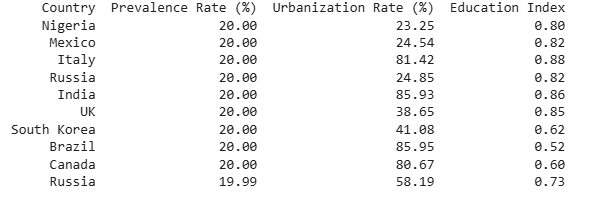

Aquí obtengo valores muy extraños de incidencia de la lepra.

*   **Mortalidad por país por rango de edad** veo valores que tampoco me parecen reales. Por ejemplo mirando los valores en Argentina obtengo lo siguiente:
Enfermedad más común por rango de edad en Argentina:

Edad 61+: Measles (999,962 personas)
Edad 0-18: Asthma (1,000,000 personas)
Edad 19-35: Cholera (999,995 personas)
Edad 36-60: Diabetes (999,775 personas)

Me sorprende que la enfermedad más común en el rango de 19-35 años sea el cólera.

*   **Tasa de mortalidad por país** que obtengo es la siguiente:
Enfermedades con mayor tasa de mortalidad por país:




    *   Argentina: Diabetes (5.127741670094611%)
    *   Australia: HIV/AIDS (5.138639618138425%)
    *   Brazil: COVID-19 (5.179767061708214%)
    *   Canada: Rabies (5.151473895582329%)
    *   China: Asthma (5.184743019020639%)
    *   France: Parkinson's Disease (5.1708602150537635%)
    *   Germany: Asthma (5.188142119888845%)
    *   India: Leprosy (5.2024929859719435%)
    *   Indonesia: Parkinson's Disease (5.152597077244258%)
    *   Italy: Alzheimer's Disease (5.204165998396151%)
    *   Japan: Hepatitis (5.155308896210873%)
    *   Mexico: Tuberculosis (5.166148538961039%)
    *   Nigeria: COVID-19 (5.220434439178515%)
    *   Russia: Cancer (5.163564705882353%)
    *   Saudi Arabia: Asthma (5.141629802095459%)
    *   South Africa: Zika (5.097000400480576%)
    *  South Korea: Parkinson's Disease (5.164582329317269%)
    *   Turkey: Zika (5.157434959349594%)
    *   UK: Measles (5.190866471326915%)
    *   USA: Rabies (5.126278225806452%)

Me sorprende mucho que Canadá, por ejemplo, tenga una tasa de mortalidad por rabia del 5,15%.


*  **Porcentaje promedio de recuperación por país** es muy similiar en todos, en torno al 74%.

*   **Enfermedad más y menos mortal por país**:
Me llaman la atención algunos valores como:
France
  Más mortal: Leprosy (10.0%)
  Menos mortal: Cholera (0.1%)

 Turkey
  Más mortal: Ebola (10.0%)
  Menos mortal: Tuberculosis (0.1%)

 USA
  Más mortal: Zika (10.0%)
  Menos mortal: HIV/AIDS (0.1%)

  No creo que en Francia la enfermedad más mortal sea la lepra o que en Turquía sea el Ébola o en USA el Zika.

*   **Enfermedad con más afectados por continente**: Obtengo los siguientes valores:
Enfermedad más común por continente:

    *   América :  Zika (6,361,801,871 personas)
    *   Asia: HIV/AIDS (10,144,780,099 personas)
    *   Oceanía: Hepatitis (1,293,990,565 personas)
    *   Europa: Rabies (5,135,310,720 personas)
    *   África: Polio (2,575,989,103 personas)

Aquí igualmente no me cuadra que en Asia la enfermedad más común sea HIV o que en Europa sea la rabia.

En definitiva, aunque este dataset parecía muy completo, interesante y traía un montón de información para poder comparar países en función de muchas variables, el hecho de que haya muchos datos sintéticos ha distorsionado por completo los resultados y por tanto no se puede sacar ninguna conclusión coherente de ellos.




